In [1]:
# Input Library yang Dibutuhkan dalam Pembuatan Simulator

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Input Parameter yang Dibutuhkan dalam Pembuatan Simulator

# # Input Parameter Reservoir
# Reservoir_wide = float(input("Masukkan Lebar Reservoir (ft) : "))
# Reservoir_long = float(input("Masukkan Panjang Reservoir (ft) : "))
# Reservoir_thickness = float(input("Masukkan Ketebalan Reservoir (ft) : "))
# Porosity = float(input("Masukkan Porositas Reservoir (fraction) : "))

# # Input Parameter Fluida
# Oil_viscosity = float(input("Masukkan Viskositas Minyak (cp) : "))
# Water_viscosity = float(input("Masukkan Viskositas Air (cp) : "))

# # Input Parameter Saturasi Awal
# Swi = float(input("Masukkan Saturasi Air Awal (Swi) : "))
# Sor = float(input("Masukkan Saturasi Minyak Residual (Sor) : "))

# # Input Parameter Koefisien dan Eksponen Relatif Permeabilitas
# ao = float(input("Masukkan Koefisien Relatif Permeabilitas Minyak (ao) : "))
# aw = float(input("Masukkan Koefisien Relatif Permeabilitas Air (aw) : "))
# no = float(input("Masukkan Eksponen Relatif Permeabilitas Minyak (no) : "))
# nw = float(input("Masukkan Eksponen Relatif Permeabilitas Air (nw) : "))

# # Input Parameter Injection Rate
# Injection_rate = float(input("Masukkan Laju Injeksi (bbl/day) : "))

# Input Parameter Reservoir
Reservoir_wide = 287
Reservoir_long = 1016
Reservoir_thickness = 24
Porosity = 0.15

# Input Parameter Fluida
Oil_viscosity = 14.9
Water_viscosity = 1.5

# Input Parameter Saturasi Awal
Swi = 0.15
Sor = 0.239

# Input Parameter Koefisien dan Eksponen Relatif Permeabilitas
ao = 1
aw = 0.59
no = 2.6
nw = 2.75

# Input Parameter Injection Rate
Injection_rate = 423

#-----------------------------------------------------------------------------

# Menghitung Luas Reservoir
Reservoir_area = Reservoir_wide * Reservoir_long * Reservoir_thickness

# Menghitung Pore Volume
Pore_volume = Reservoir_area * Porosity

# Convert Pore Volume ke dalam bbl
Pore_volume = Pore_volume * 0.1781076

#-------------------------------------------------------------------------------
pd.options.display.float_format = '{:.2f}'.format

# Membuat Tabel Berisikan Nilai Input Parameter
table_index_name = ['Reservoir Wide (ft)', 'Reservoir Long (ft)', 'Reservoir Thickness (ft)', 'Porosity (fraction)', 'Oil Viscosity (cp)', 'Water Viscosity (cp)', 'Swi', 'Sor', 'ao', 'aw', 'no', 'nw', 'Injection Rate (bbl/day)', 'Reservoir Area', 'Pore Volume (bbl)']
table_data = {'Value' : [Reservoir_wide, Reservoir_long, Reservoir_thickness, Porosity, Oil_viscosity, Water_viscosity, Swi, Sor, ao, aw, no, nw, Injection_rate, Reservoir_area, Pore_volume],
              'Unit' : ['ft', 'ft', 'ft', 'fraction', 'cp', 'cp', '', '', '', '', '', '', 'bbl/day', 'ft^3', 'bbl']}

table = pd.DataFrame(table_data, index = table_index_name)
table

,Value,Unit
Reservoir Wide (ft),287.00,ft
Reservoir Long (ft),1016.00,ft
Reservoir Thickness (ft),24.00,ft
Porosity (fraction),0.15,fraction
Oil Viscosity (cp),14.90,cp
Water Viscosity (cp),1.50,cp
Swi,0.15,
Sor,0.24,
ao,1.00,
aw,0.59,


## Construct Fractional Flow Curve

### Arrange Swd or Sw* Values

In [3]:
Swd = np.arange(0, 1.1, 0.1)
Swd

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

### Calculate Sw Values

In [4]:
Sw = (Swd * (1 - Swi - Sor)) + Swi
Sw

array([0.15  , 0.2111, 0.2722, 0.3333, 0.3944, 0.4555, 0.5166, 0.5777,
       0.6388, 0.6999, 0.761 ])

### Corey's Correlation

$$
k_{ro} = a_{o} \cdot \left(1 - Sw\right)^{n_{o}}
$$
$$
k_{rw} = a_{w} \cdot Sw^{n_{w}}
$$
$$
S_{wd} = \frac{S_{w} - S_{wi}}{1 - S_{or} - S_{wi}}
$$

### Calculate Kro Values using Corey's Correlation

In [5]:
Kro = ao * ((1 - Swd) ** no)
Kro

array([1.        , 0.76037972, 0.55980138, 0.39559874, 0.26496789,
       0.16493849, 0.09233279, 0.0437034 , 0.01522923, 0.00251189,
       0.        ])

### Calculate Krw Values using Corey's Correlation

In [6]:
Krw = aw * (Swd ** nw)
Krw

array([0.        , 0.00104918, 0.00705805, 0.02152462, 0.04748069,
       0.08770402, 0.1447998 , 0.22124406, 0.31941071, 0.44158968,
       0.59      ])

### Fractional Flow Equation

$$
f_w = \frac{1}{1 + \left(\frac{k_o}{k_w}\right)\left(\frac{\mu_w}{\mu_o}\right)} + \frac{\frac{k_o A}{\mu_o q_t} \left[ \frac{\partial P_c}{\partial x} + (\rho_o - \rho_w)g \sin \alpha \right]}{1 + \left(\frac{k_o}{k_w}\right)\left(\frac{\mu_w}{\mu_o}\right)}
$$

$$
f_w = \frac{1}{1 + \left(\frac{k_o}{k_w}\right)\left(\frac{\mu_w}{\mu_o}\right)}
$$

### Calculate Fractional Flow Using Equation

In [7]:
Fw = 1 / (1 + ((Kro / Krw) * ( Water_viscosity / Oil_viscosity)))
Fw

/var/folders/w5/0trdcvnj2sl845mfj4rljf600000gn/T/ipykernel_3006/948377422.py:1: RuntimeWarning: divide by zero encountered in divide
  Fw = 1 / (1 + ((Kro / Krw) * ( Water_viscosity / Oil_viscosity)))


array([0.        , 0.01352086, 0.11130127, 0.35084955, 0.6402871 ,
       0.84081322, 0.93967848, 0.98050169, 0.99522301, 0.99942768,
       1.        ])

### Table of Results For Fractional Flow

In [8]:
fw_result = pd.DataFrame({'Swd' : Swd, 'Sw' : Sw, 'Kro' : Kro, 'Krw' : Krw, 'Fw' : Fw})
pd.options.display.float_format = '{:.6f}'.format
fw_result

,Swd,Sw,Kro,Krw,Fw
0,0.000000,0.150000,1.000000,0.000000,0.000000
1,0.100000,0.211100,0.760380,0.001049,0.013521
2,0.200000,0.272200,0.559801,0.007058,0.111301
3,0.300000,0.333300,0.395599,0.021525,0.350850
4,0.400000,0.394400,0.264968,0.047481,0.640287
5,0.500000,0.455500,0.164938,0.087704,0.840813
6,0.600000,0.516600,0.092333,0.144800,0.939678
7,0.700000,0.577700,0.043703,0.221244,0.980502
8,0.800000,0.638800,0.015229,0.319411,0.995223
9,0.900000,0.699900,0.002512,0.441590,0.999428


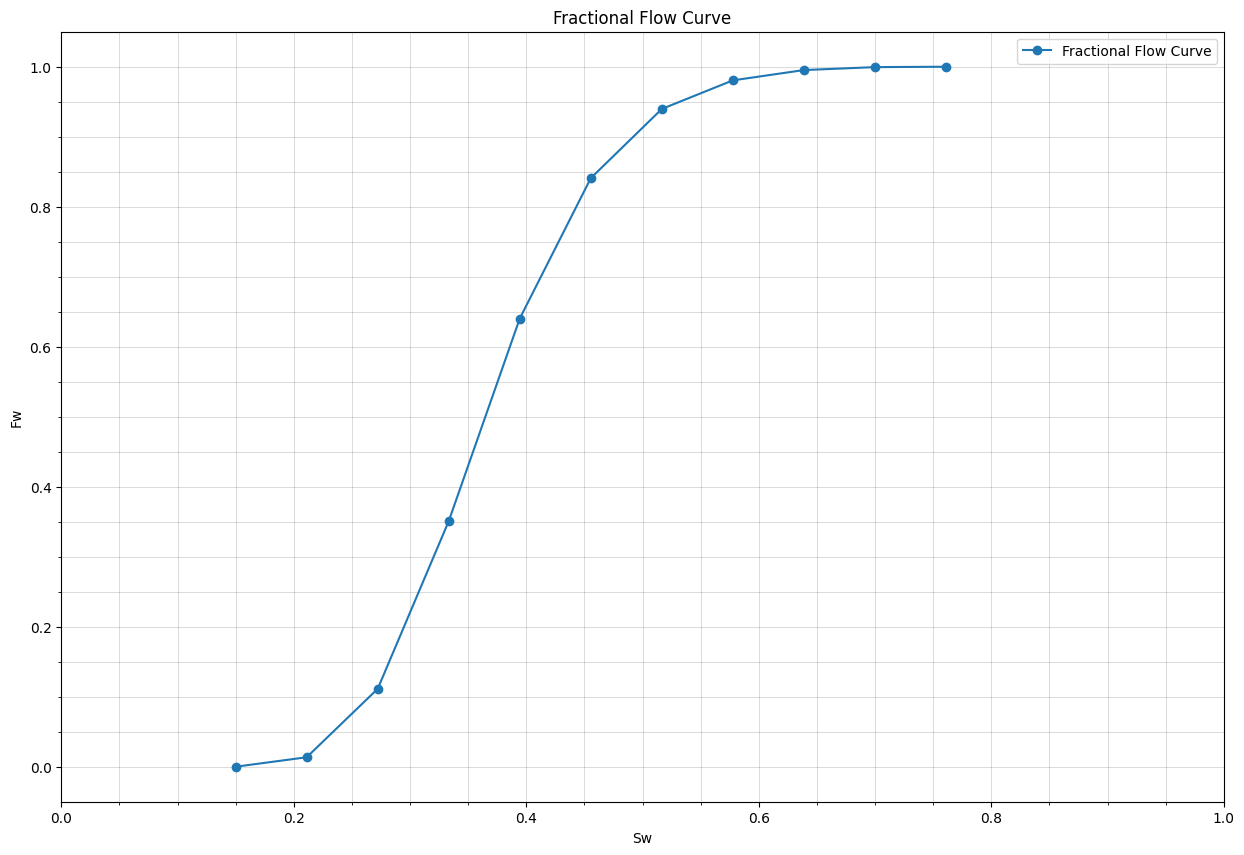

In [9]:
# Fractional Flow Curve

# Make a Canvas Size for Plot
plt.figure(figsize = (15, 10))

# Plot Fractional Flow Curve
plt.plot(Sw, Fw, label = 'Fractional Flow Curve', marker = 'o', linestyle = '-')

# Add Title and Labels
plt.title('Fractional Flow Curve')
plt.xlabel('Sw')
plt.ylabel('Fw')
plt.legend()

# Add Grid
plt.grid(which='both', linestyle='-', linewidth='0.5', color='black', alpha=0.2)

# Add Limit for X and Y Axis
plt.xlim(0, 1)

# Add Minor Ticks
plt.minorticks_on()
plt.show()

### Relative Permeability Curve

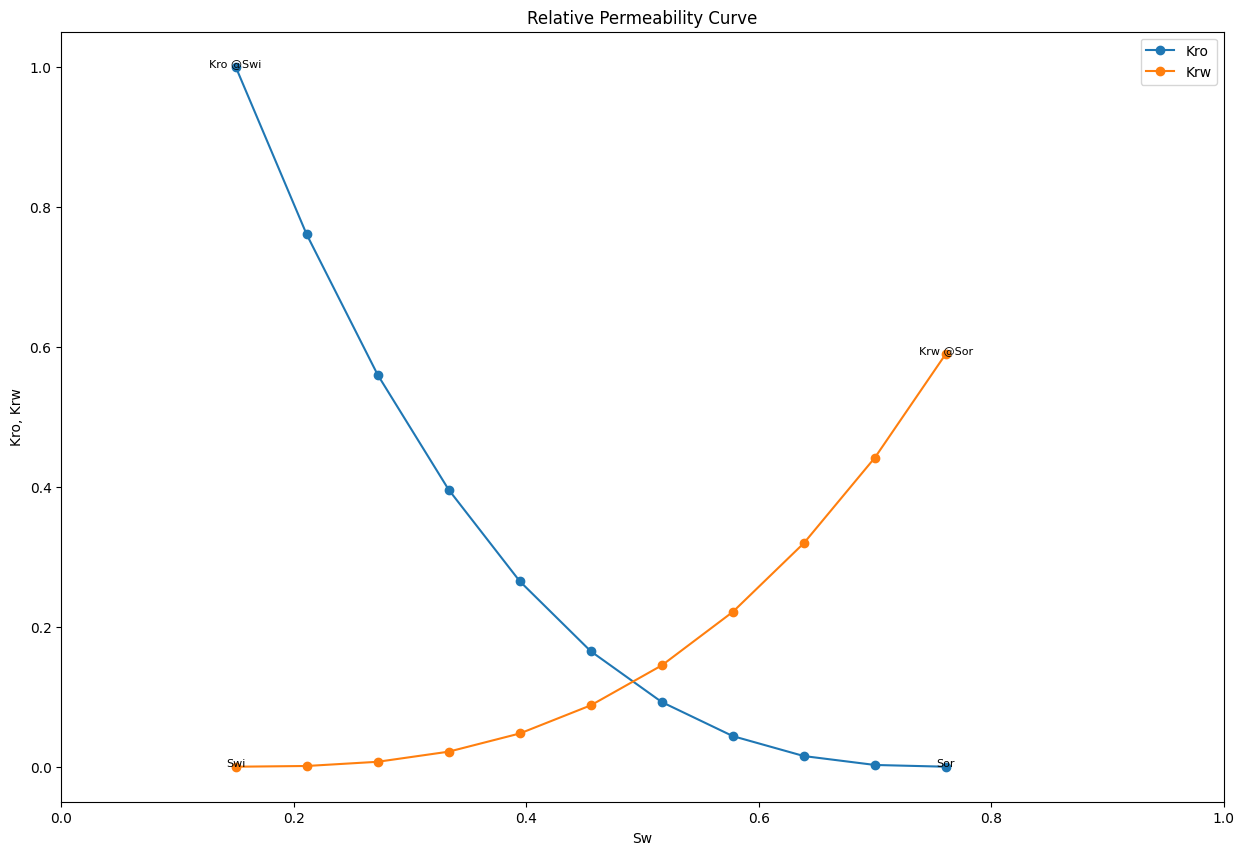

In [10]:
# Relative Permeability Curve

# Make a Canvas Size for Plot
plt.figure(figsize = (15, 10))

# Plot Relative Permeability Curve
plt.plot(Sw, Kro, label = 'Kro', marker = 'o', linestyle = '-')
plt.plot(Sw, Krw, label = 'Krw', marker = 'o', linestyle = '-')

# Add Label at the End of the Line
plt.text(Sw[0], Kro[-1], 'Swi', fontsize = 8, ha = 'center')
plt.text(Sw[-1], Krw[-1], 'Krw @Sor', fontsize = 8, ha = 'center')
plt.text(Sw[0], Kro[0], 'Kro @Swi', fontsize = 8, ha = 'center')
plt.text(Sw[-1], Krw[0], 'Sor', fontsize = 8, ha = 'center')

# Add Limit for X Axis
plt.xlim(0, 1)

# Add Title and Labels
plt.title('Relative Permeability Curve')
plt.xlabel('Sw')
plt.ylabel('Kro, Krw')
plt.legend()
plt.show()

## Breakthrough Time

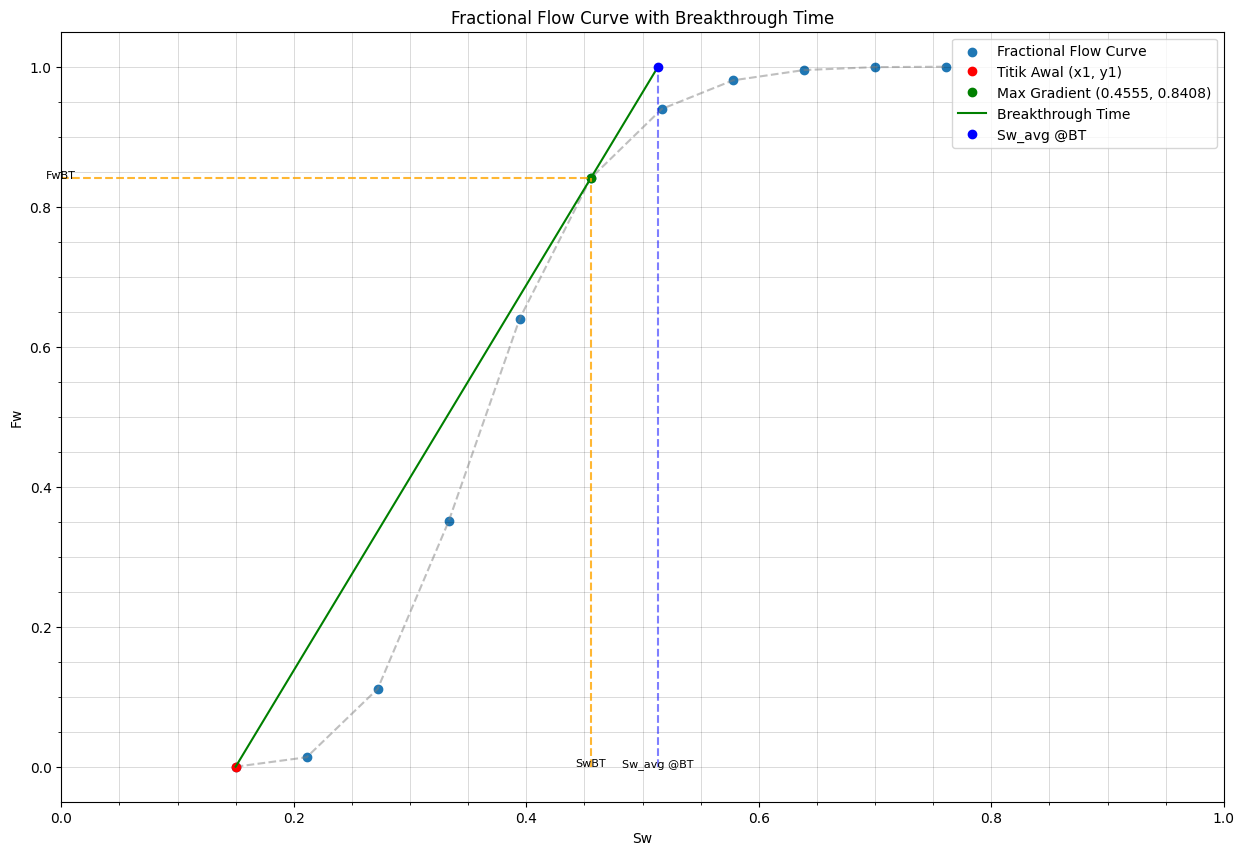

In [11]:
# assign the x and y values
x = Sw
y = Fw

# calculate the gradients between the first point and each subsequent point
gradients = [(y[i] - y[0]) / (x[i] - x[0]) for i in range(1, len(x))]

# find the maximum gradient
max_gradien = max(gradients)
max_index = gradients.index(max_gradien) + 1

x_max_gradien = x[max_index]
y_max_gradien = y[max_index]

# Calculate the y-intercept (c) using the first point (x[0], y[0])
c = y[0] - max_gradien * x[0]

# print the result of X values with the maximum gradient
x_value = (1 - c) / max_gradien
#print(f'X value with the maximum gradient: {x_value:.4f}')

# Define the linear function using the calculated gradient and intercept
def linear_function(x):
    result = max_gradien * x + c
    return min(1, max(0, result))

# Generate x values for plotting the linear function
x_line = np.linspace(min(x), min((1 - c) / max_gradien, max(x)), 100)
y_line = [linear_function(x) for x in x_line]

# create a DataFrame with the gradient results
data = {
    'X1': [x[0]] * len(gradients),
    'Y1': [y[0]] * len(gradients),
    'X2': [x[i] for i in range(1, len(x))],
    'Y2': [y[i] for i in range(1, len(x))],
    'Gradien': gradients
}

df = pd.DataFrame(data)

# plot the original data
plt.figure(figsize=(15, 10))
plt.scatter(x, y, label='Fractional Flow Curve')
plt.plot(x, y, color='gray', linestyle='--', alpha=0.5)

# plot the lines connecting the first point to the other points
# for i in range(1, len(x)):
#     plt.plot([x[0], x[i]], [y[0], y[i]], linestyle='--', color='gray', alpha=0.5)

# highlight the first data point
plt.plot(x[0], y[0], 'ro', label='Titik Awal (x1, y1)')

# Highlight the point with the maximum gradient
plt.plot(x_max_gradien, y_max_gradien, 'go', label=f'Max Gradient ({x_max_gradien:.4f}, {y_max_gradien:.4f})')

# Plot the linear function
# plt.plot(x_line, y_line, label=f'Linear Fit: y = {max_gradien:.2f}x + {c:.2f}', color='green')
plt.plot(x_line, y_line, label=f'Breakthrough Time', color='green')

# Plot the intersection point
# plt.plot(x_value, linear_function(x_value), 'bo', label=f'Intersection Point ({x_value:.4f}, {linear_function(x_value):.4f})')
plt.plot(x_value, linear_function(x_value), 'bo', label=f'Sw_avg @BT')
plt.plot([x_value, x_value], [0, linear_function(x_value)], linestyle='--', color='blue', alpha=0.5)
plt.text(x_value, 0, 'Sw_avg @BT', fontsize=8, ha='center')

# Plot the line connecting the max gradient to Y and X axis
plt.plot([x_max_gradien, x_max_gradien], [0, y_max_gradien], linestyle='--', color='orange', alpha=0.8)
plt.text(0, y_max_gradien, 'FwBT', fontsize=8, ha='center')
plt.plot([0, x_max_gradien], [y_max_gradien, y_max_gradien], linestyle='--', color='orange', alpha=0.8)
plt.text(x_max_gradien, 0, 'SwBT', fontsize=8, ha='center')


# add the title and labels
plt.title('Fractional Flow Curve with Breakthrough Time')
plt.xlabel('Sw')
plt.ylabel('Fw')
plt.xlim(0, 1)
plt.legend()

# display the plot
plt.grid(which='both', linestyle='-', linewidth='0.5', color='black', alpha=0.2)

# Add Minor Ticks
plt.minorticks_on()
plt.show()

In [12]:
# create DataFrame for the Result at Breakthrough Time

Sw_BT = x_max_gradien
Fw_BT = y_max_gradien
Sw_AVG = x_value

result_data = {'Sw' : Sw_BT, 'Fw' : Fw_BT, 'Sw Average' : Sw_AVG}
result_table = pd.DataFrame(result_data, index = ['Breakthrough Time'])

## After Breakthrough Time

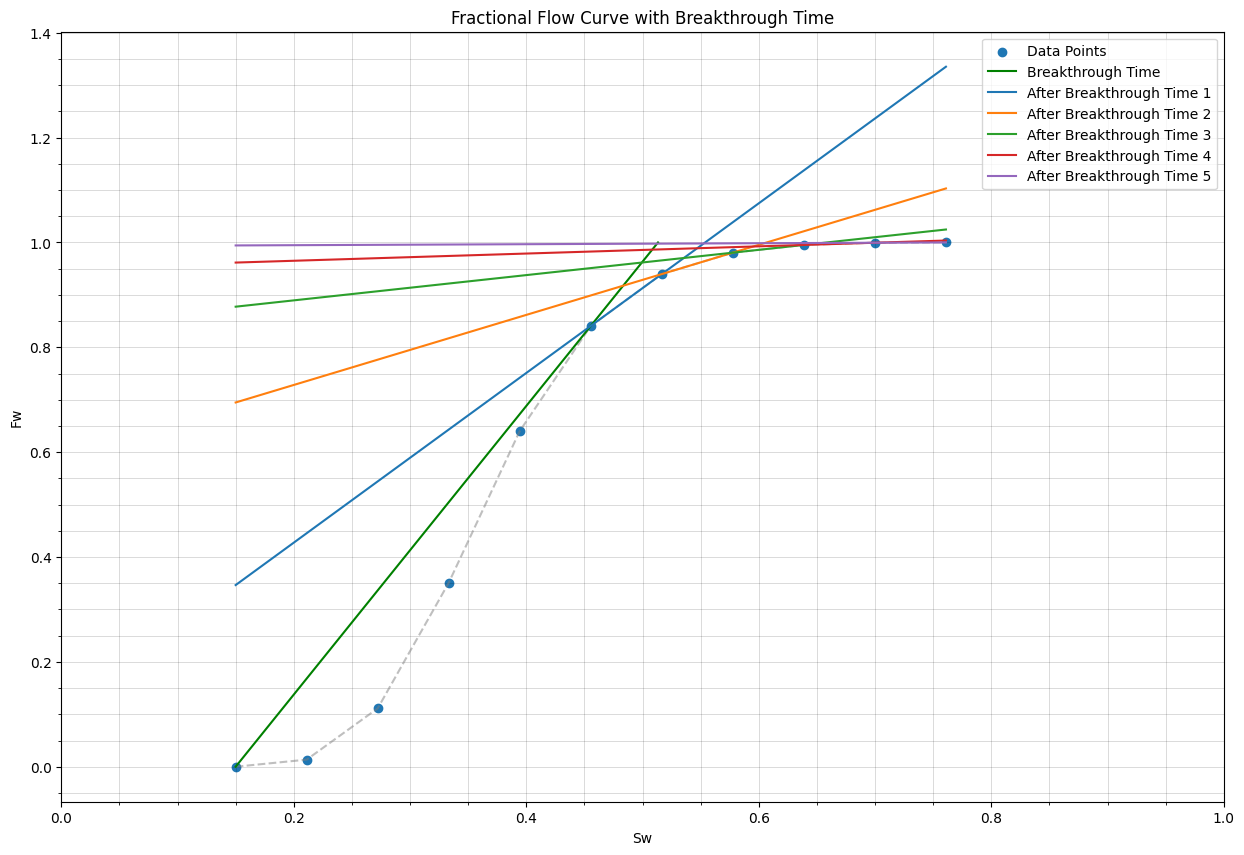

In [13]:
# assign the x and y values
x = Sw
y = Fw

# calculate the gradients between the first point and each subsequent point (for breakthrough time)
gradient_BT = [(y[i] - y[0]) / (x[i] - x[0]) for i in range(1, len(x))]

# find the maximum gradient
max_gradien_BT = max(gradient_BT)
max_index_BT = gradient_BT.index(max_gradien_BT) + 1

x_max_gradien_BT = x[max_index_BT]
y_max_gradien_BT = y[max_index_BT]

# Calculate the y-intercept (c) using the first point (x[0], y[0])
c_BT = y[0] - max_gradien_BT * x[0]

# print the result of X values with the maximum gradient
x_value_BT = (1 - c_BT) / max_gradien_BT
#print(f'X value with the maximum gradient: {x_value:.4f}')

# Define the linear function using the calculated gradient and intercept
def linear_function_BT(x):
    result = max_gradien_BT * x + c_BT
    return min(1, max(0, result))

# Generate x values for plotting the linear function
x_line_BT = np.linspace(min(x), min((1 - c_BT) / max_gradien_BT, max(x)), 100)
y_line_BT = [linear_function_BT(x) for x in x_line_BT]

# create a DataFrame with the gradient results
data_BT = {
    'X1': [x[0]] * len(gradient_BT),
    'Y1': [y[0]] * len(gradient_BT),
    'X2': [x[i] for i in range(1, len(x))],
    'Y2': [y[i] for i in range(1, len(x))],
    'Gradien': gradient_BT
}

df_BT = pd.DataFrame(data_BT)

# calculate the gradients (for after breakthrough time)
index_start = max_index_BT

data_after_BT = []
for i in range(index_start + 1, len(Sw)):
    X1 = Sw[i - 1]
    X2 = Sw[i]
    Y1 = Fw[i - 1]
    Y2 = Fw[i]
    delta_Fw = Y2 - Y1
    delta_Sw = X2 - X1
    gradient = delta_Fw / delta_Sw
    equation = f"y - {Y1} = {gradient} * (x - {X1})"
    
    # Menghitung nilai x ketika y = 1
    y_value = 1
    if gradient != 0:  # Untuk menghindari pembagian dengan nol
        x_value = (y_value - Y1) + (gradient* X1) / gradient
    else:
        x_value = None  # Jika gradient 0, garis horizontal, x tidak dapat ditentukan dengan y
    
    data_after_BT.append([X1, X2, Y1, Y2, gradient, equation, x_value])

# create a DataFrame with the gradient results
df_after_BT = pd.DataFrame(data_after_BT, columns=['X1', 'X2', 'Y1', 'Y2', 'Gradient', 'Equation', 'X Value'])

# plot the original data
plt.figure(figsize=(15, 10))
plt.scatter(x, y, label='Data Points')
plt.plot(x, y, color='gray', linestyle='--', alpha=0.5)

# plot the linear function at breakthrough time
plt.plot(x_line_BT, y_line_BT, label=f'Breakthrough Time', color='green')

# plot the tangent lines at each data point for after breakthrough time
for i in range(len(df_after_BT)):
    X1, X2, Y1, Y2, gradient = df_after_BT.loc[i, ['X1', 'X2', 'Y1', 'Y2', 'Gradient']]
    x_vals = np.linspace(min(Sw), max(Sw), 100)
    y_vals = Y1 + gradient * (x_vals - X1)
    plt.plot(x_vals, y_vals, label=f'After Breakthrough Time {i+1}')

# add the title and labels
plt.title('Fractional Flow Curve with Breakthrough Time')
plt.xlabel('Sw')
plt.ylabel('Fw')
plt.xlim(0, 1)
plt.legend()

# display the plot
plt.grid(which='both', linestyle='-', linewidth='0.5', color='black', alpha=0.2)

# Add Minor Ticks
plt.minorticks_on()
plt.show()

In [14]:
import numpy as np
import pandas as pd

df_after_BT.drop(df_after_BT.index[0], inplace=True)

Sw_after_BT = df_after_BT['X1'].values
Fw_after_BT = df_after_BT['Y1'].values
Sw_AVG_after_BT = df_after_BT['X Value'].values

Sw = np.insert(Sw_after_BT, 0, Sw_BT)
Fw = np.insert(Fw_after_BT, 0, Fw_BT)
Sw_AVG = np.insert(Sw_AVG_after_BT, 0, Sw_AVG)
dFw_dSw = 1 / (Sw_AVG - Swi)
tBT = (Pore_volume / Injection_rate) * (1 / dFw_dSw)
oil_rate = Injection_rate * (1 - Fw)
water_cut = Fw
water_oil_ratio = Fw / (1 - Fw)
np = Pore_volume * (Sw_AVG - Swi)
RF = np / Pore_volume * (1 - Swi)
PVI = Sw_AVG - Swi

result_data = {'Sw': Sw,
               'Fw': Fw,
               'Sw Average': Sw_AVG,
               'dFW/dSw': dFw_dSw,
               'tBT (Day)': tBT,
               'Qo (bbl/day)': oil_rate,
               'WC (%)': water_cut * 100,
               'WOR': water_oil_ratio,
               'Np': np,
               'RF (%)': RF * 100,
               'PVI (%)': PVI * 100
               }
result_table = pd.DataFrame(result_data)

$$
\frac{dFw}{dSw} = \frac{1}{(Sw_{\text{AVG}} - Sw_i)}
$$
$$
t_{BT} = \frac{\text{Pore Volume}}{q_T} \cdot \frac{1}{\left( \frac{dFw}{dSw} \right)}
$$
$$
q_o = q_T \cdot (1 - fw_{BT})
$$
$$
WC = \frac{q_W}{q_T} = fw_{BT}
$$
$$
WOR = \frac{fw_{BT}}{1 - fw_{BT}}
$$
$$
N_p = V_p \cdot (Sw_{\text{AVG}} - Sw_{\text{wi}})
$$
$$
RF = \frac{N_p}{V_p \cdot (1 - Sw_{\text{wi}})}
$$

## Production Profile

In [15]:
# Data awal sebelum breakthrough
Sw_before_BT = 0
Fw_before_BT = 0
Sw_AVG_before_BT = 0
dFw_dSw_before_BT = 0
tBT_before_BT = 0
oil_rate_before_BT = Injection_rate
water_cut_before_BT = 0
water_oil_ratio_before_BT = 0
np_before_BT = 0
RF_before_BT = 0
PVI_before_BT = 0

Sw_before_BT1 = 0
Fw_before_BT1 = result_table.loc[0, 'Fw']
Sw_AVG_before_BT1 = 0
dFw_dSw_before_BT1 = 0
tBT_before_BT1 = result_table.loc[0, 'tBT (Day)']
oil_rate_before_BT1 = Injection_rate
water_cut_before_BT1 = result_table.loc[0, 'WC (%)']
water_oil_ratio_before_BT1 = result_table.loc[0, 'WOR']
np_before_BT1 = result_table.loc[0, 'Np']
RF_before_BT1 = result_table.loc[0, 'RF (%)']
PVI_before_BT1 = result_table.loc[0, 'PVI (%)']

# Data sebelum breakthrough
data_before_BT = {
    'Sw': [Sw_before_BT, Sw_before_BT1],
    'Fw': [Fw_before_BT, Fw_before_BT1],
    'Sw Average': [Sw_AVG_before_BT, Sw_AVG_before_BT1],
    'dFW/dSw': [dFw_dSw_before_BT, dFw_dSw_before_BT1],
    'tBT (Day)': [tBT_before_BT, tBT_before_BT1],
    'Qo (bbl/day)': [oil_rate_before_BT, oil_rate_before_BT1],
    'WC (%)': [water_cut_before_BT, water_cut_before_BT1],
    'WOR': [water_oil_ratio_before_BT, water_oil_ratio_before_BT1],
    'Np': [np_before_BT, np_before_BT1],
    'RF (%)': [RF_before_BT, RF_before_BT1],
    'PVI (%)': [PVI_before_BT, PVI_before_BT1]
}

# Membuat DataFrame
df_before_BT = pd.DataFrame(data_before_BT)

# Menggabungkan dengan result_table
final_result = pd.concat([df_before_BT, result_table.reset_index(drop=True)], ignore_index=True)

# Mengubah nama indeks
final_result.index = ['Before Breakthrough' if i <= 1 else 'At Breakthrough' if i == 2 else f'After Breakthrough {i-2}' for i in range(len(final_result))]

# Simpan ke Excel
final_result.to_excel('Fractional_Flow_Result.xlsx', index=True)

# Tampilkan hasil
final_result

,Sw,Fw,Sw Average,dFW/dSw,tBT (Day),Qo (bbl/day),WC (%),WOR,Np,RF (%),PVI (%)
Before Breakthrough,0.000000,0.000000,0.000000,0.000000,0.000000,423.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Before Breakthrough,0.000000,0.840813,0.000000,0.000000,160.594946,423.000000,84.081322,5.281929,67931.662308,30.883791,36.333872
At Breakthrough,0.455500,0.840813,0.513339,2.752253,160.594946,67.336009,84.081322,5.281929,67931.662308,30.883791,36.333872
After Breakthrough 1,0.516600,0.939678,0.576922,2.342351,188.698410,25.516004,93.967848,15.577831,79819.427223,36.288329,42.692152
After Breakthrough 2,0.577700,0.980502,0.597198,2.236144,197.660707,8.247785,98.050169,50.286495,83610.478897,38.011856,44.719831
After Breakthrough 3,0.638800,0.995223,0.643577,2.026026,218.159983,2.020665,99.522301,208.337043,92281.672742,41.954044,49.357699
After Breakthrough 4,0.699900,0.999428,0.700472,1.816622,243.307599,0.242091,99.942768,1746.280168,102919.114568,46.790147,55.047232


### Graphic for Production Profile

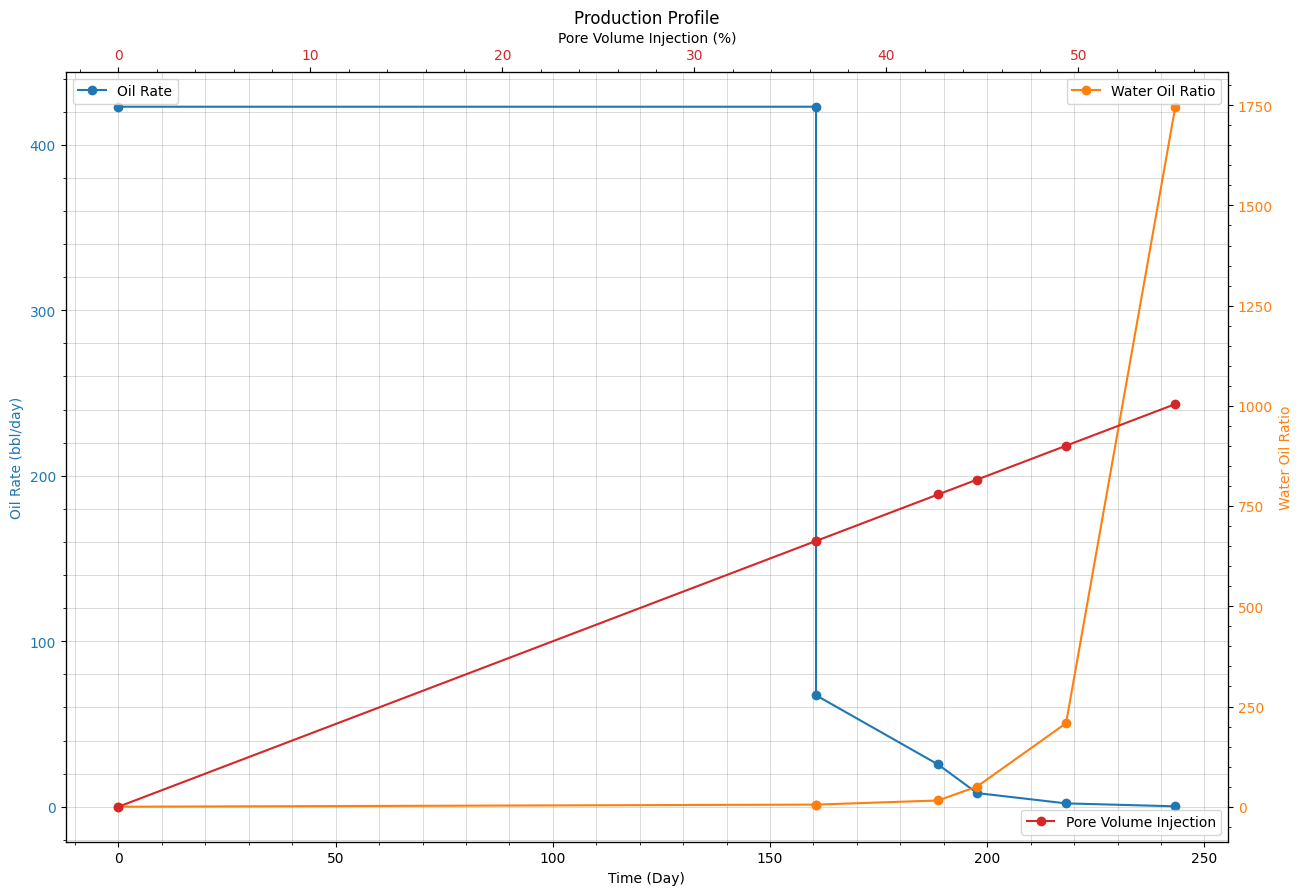

In [16]:
# Membuat ukuran canvas untuk plot
fig, ax1 = plt.subplots(figsize=(15, 10))

# Plot Oil Rate dan Cumulative Oil Production pada sumbu pertama (ax1)
ax1.set_xlabel('Time (Day)')
ax1.set_ylabel('Oil Rate (bbl/day)', color='tab:blue')
ax1.plot(final_result['tBT (Day)'], final_result['Qo (bbl/day)'], label='Oil Rate', marker='o', linestyle='-', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.legend(loc='upper left')

# Menambahkan sumbu kedua untuk Water Oil Ratio
ax2 = ax1.twinx()
ax2.set_ylabel('Water Oil Ratio', color='tab:orange')
ax2.plot(final_result['tBT (Day)'], final_result['WOR'], label='Water Oil Ratio', marker='o', linestyle='-', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')
ax2.legend(loc='upper right')

# Plot Pore Volume Injection pada sumbu X kedua
ax3 = ax1.twiny()
ax3.set_xlabel('Pore Volume Injection (%)')
ax3.plot(final_result['PVI (%)'], final_result['tBT (Day)'], label='Pore Volume Injection', marker='o', linestyle='-', color='tab:red')
ax3.tick_params(axis='x', labelcolor='tab:red')
ax3.legend(loc='lower right')

# Menambahkan judul
plt.title('Production Profile')

# Menambahkan grid skala minor
ax1.grid(which='both', linestyle='-', linewidth='0.5', color='black', alpha=0.2)
ax1.minorticks_on()
ax2.minorticks_on()
ax3.minorticks_on()

# Menampilkan plot
plt.show()